In [2]:
##importing packages
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set()

import numpy as np

In [3]:
#reading in the data
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [62]:
variable_def = pd.read_csv('VariableDefinitions.csv')




# rename columns for easier identificaton

In [10]:
def rename_cols(df):
      df.rename(columns={"MONTANT": "TOPUP_AMT",
                      "ARPU_SEGMENT": "MONTHLY_INCOME",
                      "REVENUE": "TOTAL_INCOME",
                      "FREQUENCE_RECH": "RECHARGE_FREQ",
                      "FREQUENCY": "INCOME_FREQ",
                      "DATA_VOLUME": "NO_OF_CONNECTIONS",
                      }, inplace=True)
  
      return df

In [69]:
train = rename_cols(train)
test = rename_cols(test)
variable_def = rename_cols(variable_def)

In [70]:
data_info=variable_def.rename(columns={'Variable Definitions':'var_def', 'Unnamed: 1':'french', 'Unnamed: 2':'english'})
data_info.set_index('var_def')
data_info.drop(columns=['french'], axis=1, inplace=True)

def var_def(col_name):
    print(data_info.loc[col_name]['english'])

In [14]:
train.shape, test.shape

((400000, 19), (100000, 18))

In [17]:
train.isnull().count()

user_id              400000
REGION               400000
TENURE               400000
TOPUP_AMT            400000
RECHARGE_FREQ        400000
TOTAL_INCOME         400000
MONTHLY_INCOME       400000
FREQUENCE            400000
NO_OF_CONNECTIONS    400000
ON_NET               400000
ORANGE               400000
TIGO                 400000
ZONE1                400000
ZONE2                400000
MRG                  400000
REGULARITY           400000
TOP_PACK             400000
FREQ_TOP_PACK        400000
CHURN                400000
dtype: int64

In [18]:
train.isnull().sum().sort_values(ascending=False)

ZONE2                374487
ZONE1                368310
TIGO                 239386
NO_OF_CONNECTIONS    196854
TOP_PACK             167329
FREQ_TOP_PACK        167329
ORANGE               166317
REGION               157520
ON_NET               145819
TOPUP_AMT            140277
RECHARGE_FREQ        140277
FREQUENCE            134663
MONTHLY_INCOME       134663
TOTAL_INCOME         134663
TENURE                    0
CHURN                     0
MRG                       0
REGULARITY                0
user_id                   0
dtype: int64

# missing data and percentage of false

In [22]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ZONE2,374487,0.936218
ZONE1,368310,0.920775
TIGO,239386,0.598465
NO_OF_CONNECTIONS,196854,0.492135
TOP_PACK,167329,0.418322
FREQ_TOP_PACK,167329,0.418322
ORANGE,166317,0.415793
REGION,157520,0.393800
ON_NET,145819,0.364548
TOPUP_AMT,140277,0.350693


# For test data

In [23]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ZONE2,93578,0.93578
ZONE1,92320,0.92320
TIGO,59788,0.59788
NO_OF_CONNECTIONS,49338,0.49338
TOP_PACK,41703,0.41703
FREQ_TOP_PACK,41703,0.41703
ORANGE,41200,0.41200
REGION,39293,0.39293
ON_NET,36383,0.36383
RECHARGE_FREQ,34951,0.34951


In [31]:
train.describe(exclude = np.number)
#no duplicate in user_id , MRG is useless

,user_id,REGION,TENURE,MRG,TOP_PACK
count,400000,242480,400000,400000,232671
unique,400000,14,8,1,111
top,c36a07394ea2d4557d36775cee9166c27f1ca61a,DAKAR,K > 24 month,NO,All-net 500F=2000F;5d
freq,1,95517,379439,400000,58675


 Let's delete the 'MRG' column since it consists of a single value. Also, let's delete colums 'ZONE2' and 'ZONE1' since they have so many missing values.

In [32]:
train = train.drop(['MRG', 'ZONE2', 'ZONE1'], axis = 1)
test = test.drop(['MRG', 'ZONE2', 'ZONE1'], axis = 1)

 # Exploring the data

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222476EFD68>,
      dtype=object)

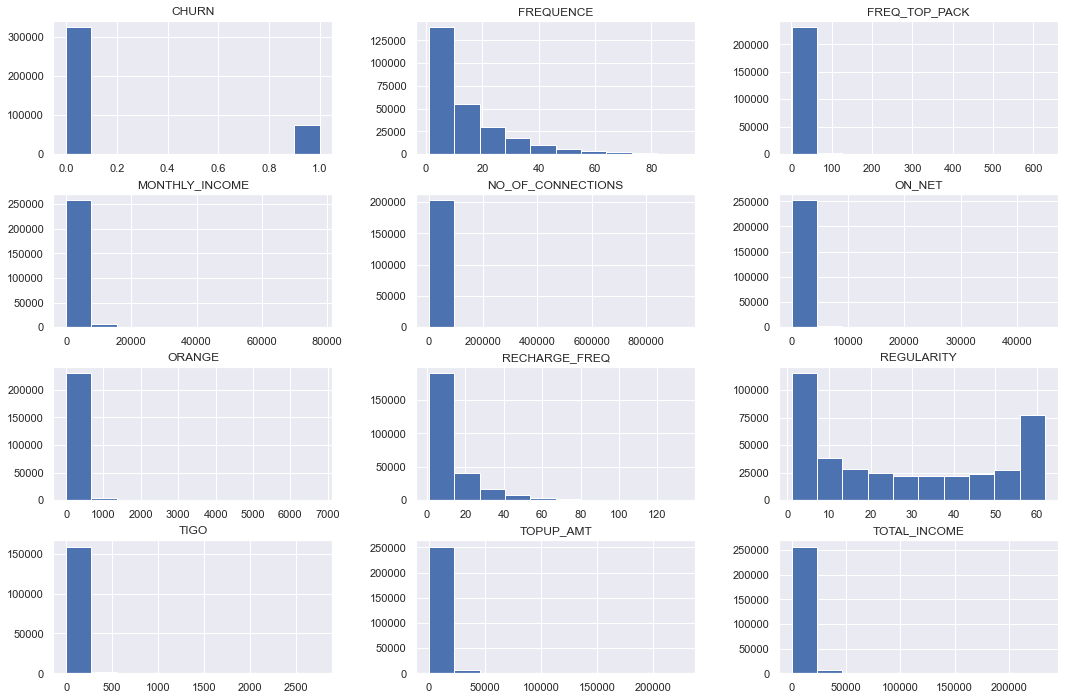

In [38]:
gig, ax = plt.subplots(figsize=(18, 12))
train.hist(ax=ax)

Text(0, 0.5, 'Frequency')

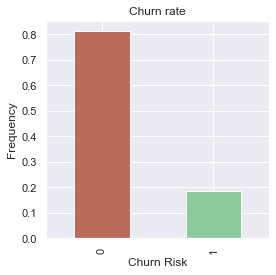

In [41]:
#bar chart to show distribution of the target variable
n_obs = train.shape[0]
#index = ['No','Yes']
churn_plot = train['CHURN'].value_counts().div(n_obs).plot(kind='bar',figsize=(4,4),title="Churn rate", color=['#BB6B5A','#8CCB9B'])
churn_plot.set_xlabel("Churn Risk")
churn_plot.set_ylabel("Frequency")

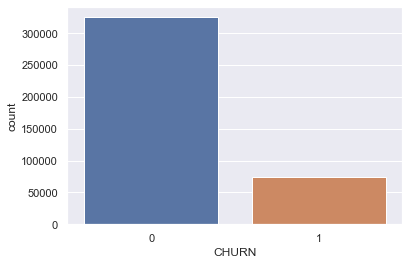

In [43]:
sns.countplot(train.CHURN)

# TOTAL_INCOME by TOTAL_INCOME

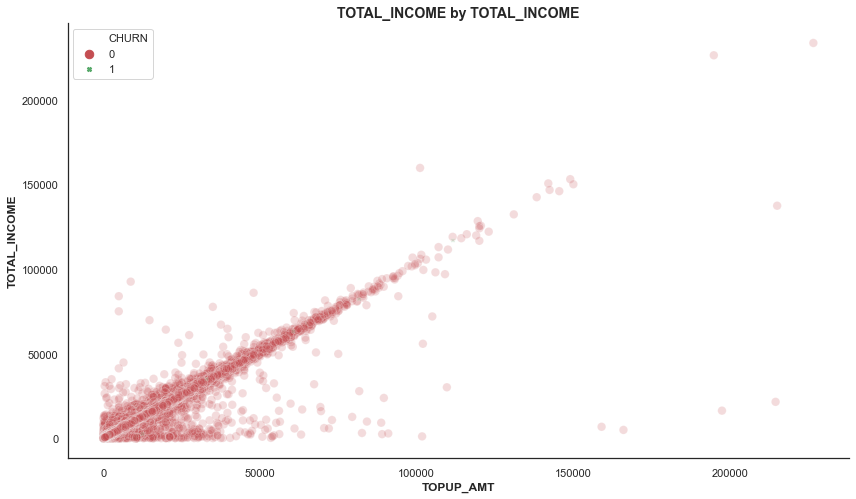

In [44]:
sns.set_style('white')
plt.figure(figsize = (14, 8))

# Create scatterplot
sns.scatterplot(x = "TOPUP_AMT", 
                y = "TOTAL_INCOME", 
                # Group by and change dot style and  by CHURN
                hue = "CHURN",
                size = "CHURN",  
                style = "CHURN", 
                data = train, 
                # Change color of hue categories
                palette = ["r", "g"],
                alpha = 0.2)

# Despine plot
sns.despine()
# Final formatting touches
plt.xlabel("TOPUP_AMT", fontsize = 12, fontweight = "semibold")
plt.ylabel("TOTAL_INCOME", fontsize = 12, fontweight = "semibold")
plt.title("TOTAL_INCOME by TOTAL_INCOME", fontsize = 14, fontweight = "semibold")
plt.show()

In [74]:
train.corr()['CHURN'].sort_values(ascending=False)

CHURN                1.000000
TIGO                -0.035890
NO_OF_CONNECTIONS   -0.036015
ON_NET              -0.057701
ORANGE              -0.063382
FREQ_TOP_PACK       -0.085136
TOPUP_AMT           -0.106229
TOTAL_INCOME        -0.114822
MONTHLY_INCOME      -0.114822
RECHARGE_FREQ       -0.123113
FREQUENCE           -0.139685
REGULARITY          -0.479120
Name: CHURN, dtype: float64

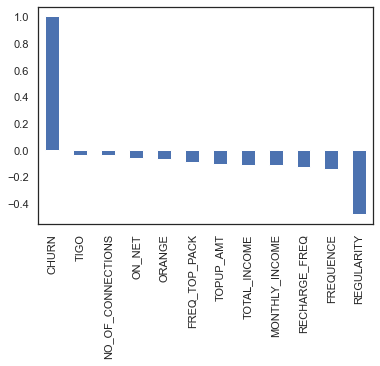

In [75]:

train.corr()['CHURN'].sort_values(ascending=False).plot(kind='bar')

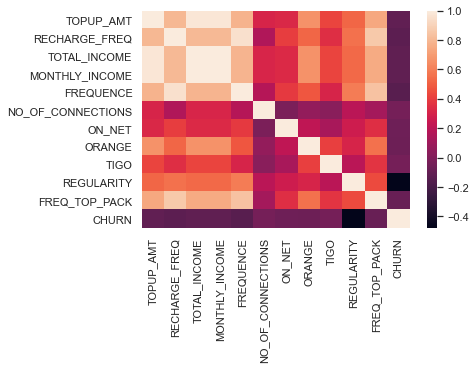

In [76]:
sns.heatmap(data=train.corr())

#  Monthly income is highly correlated to the total income. Both represent the same information but in different scales. Thus the need to drop one of them

In [118]:
# Drop Total income

train = train.drop('TOTAL_INCOME', axis =1)
test = test.drop('TOTAL_INCOME', axis =1)

KeyError: "['TOTAL_INCOME'] not found in axis"

In [81]:
# Add a new column thats average topup amount i.e. total top up amy  over the recharge frequency
def average_topup_amt(df):
  df['AVG_TOPUP_AMT'] = df['TOPUP_AMT'] / df['RECHARGE_FREQ']

  return df


In [82]:
train = average_topup_amt(train)
test = average_topup_amt(test)

# BUILDING SOME MODELS

In [160]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder

from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score, log_loss

RANDOM_SEED = 123    # Set a random seed for reproducibility!

In [86]:
from sklearn.feature_selection import SelectKBest, f_classif

# NUMERICAL DATA

In [107]:
numeric_cols = train.select_dtypes(exclude=['object']).columns
categorical_cols = ['REGION', 'TOP_PACK']


Some models, including logistic regression, only work with numeric input for features. So we'll either have to drop the categorical features or transform them. We'll opt for the later since we want to capture as much as information as we can. To do this, we'll use a method called one-hot encoding.

We also need to do some preprocessing for the numeric features. We have to scale each numeric feature and the reason for that is because we are using regularization). We will use the StandardScaler, it transforms each feature such that its distribution has a mean value of 0 and a standard deviation of 1.

In [108]:
train.head()

,user_id,REGION,TENURE,TOPUP_AMT,RECHARGE_FREQ,MONTHLY_INCOME,FREQUENCE,NO_OF_CONNECTIONS,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,AVG_TOPUP_AMT
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,6000.0,34.0,NaN,97.0,355.0,6.0,62,All-net 500F=2000F;5d,35.0,0,531.250000
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,"Data: 100 F=40MB,24H",22.0,0,148.275862
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,500.0,3.0,NaN,30.0,30.0,NaN,32,All-net 500F=2000F;5d,3.0,0,500.000000
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,832.0,4.0,0.0,159.0,45.0,19.0,18,On net 200F=Unlimited _call24H,3.0,0,500.000000
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,166.0,3.0,1.0,1.0,3.0,NaN,50,NaN,NaN,0,NaN


In [121]:
#train = train.drop('user_id', axis =1)
test = test.drop('TOTAL_INCOME', axis =1)
test.head()

,REGION,TENURE,TOPUP_AMT,RECHARGE_FREQ,MONTHLY_INCOME,FREQUENCE,NO_OF_CONNECTIONS,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,AVG_TOPUP_AMT
0,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
1,NaN,K > 24 month,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN
2,NaN,K > 24 month,1900.0,15.0,766.0,21.0,414.0,NaN,7.0,2.0,27,"Data: 100 F=40MB,24H",17.0,126.666667
3,DAKAR,K > 24 month,3000.0,9.0,868.0,14.0,332.0,0.0,23.0,4.0,46,IVR Echat_Daily_50F,3.0,333.333333
4,DAKAR,K > 24 month,32000.0,47.0,11000.0,47.0,NaN,128.0,555.0,280.0,61,All-net 500F=2000F;5d,65.0,680.851064


In [122]:
test2 = test
train2 = train

In [125]:
def handle_non_numerical_data(df):
    columns = test2.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if test2[column].dtype != np.int64 and test2[column].dtype != np.float64:
            column_contents = test2[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            test2[column] = list(map(convert_to_int, test2[column]))
    return test2

data_test = handle_non_numerical_data(test2)
data_test.head()

,REGION,TENURE,TOPUP_AMT,RECHARGE_FREQ,MONTHLY_INCOME,FREQUENCE,NO_OF_CONNECTIONS,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,AVG_TOPUP_AMT
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,NaN,NaN
1,0,0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,2,0,NaN,NaN
2,0,0,1900.0,15.0,766.0,21.0,414.0,NaN,7.0,2.0,27,78,17.0,126.666667
3,2,0,3000.0,9.0,868.0,14.0,332.0,0.0,23.0,4.0,46,14,3.0,333.333333
4,2,0,32000.0,47.0,11000.0,47.0,NaN,128.0,555.0,280.0,61,6,65.0,680.851064


In [126]:
def handle_non_numerical_data(df):
    columns = train2.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if train2[column].dtype != np.int64 and train2[column].dtype != np.float64:
            column_contents = train2[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            train2[column] = list(map(convert_to_int, train2[column]))
    return train2

data_train = handle_non_numerical_data(train2)
data_train.head()

,REGION,TENURE,TOPUP_AMT,RECHARGE_FREQ,MONTHLY_INCOME,FREQUENCE,NO_OF_CONNECTIONS,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,AVG_TOPUP_AMT
0,13,0,17000.0,32.0,6000.0,34.0,NaN,97.0,355.0,6.000000,62,8,35.0,0,531.250000
1,0,0,4300.0,29.0,1476.0,37.0,1764.0,8.0,3.0,0.000000,40,95,22.0,0,148.275862
2,2,0,1500.0,3.0,500.0,3.0,NaN,30.0,30.0,23.134608,32,8,3.0,0,500.000000
3,7,0,1500.0,3.0,832.0,4.0,0.0,159.0,45.0,19.000000,18,96,3.0,0,500.000000
4,7,0,NaN,NaN,166.0,3.0,1.0,1.0,3.0,23.134608,50,0,NaN,0,NaN


In [135]:
data_train['TIGO'] = data_train['TIGO'].fillna(data_train['TIGO'].mean())
data_test['TIGO'] = test2['TIGO'].fillna(data_test['TIGO'].mean())

data_train['FREQ_TOP_PACK'] = data_train['FREQ_TOP_PACK'].fillna(data_train['FREQ_TOP_PACK'].mean())
data_test['FREQ_TOP_PACK'] = test2['FREQ_TOP_PACK'].fillna(data_test['FREQ_TOP_PACK'].mean())


data_train['ORANGE'] = data_train['ORANGE'].fillna(data_train['ORANGE'].mean())
data_test['ORANGE'] = test2['ORANGE'].fillna(data_test['ORANGE'].mean())

data_train['ON_NET'] = data_train['ON_NET'].fillna(data_train['ON_NET'].mean())
data_test['ON_NET'] = test2['ON_NET'].fillna(data_test['ON_NET'].mean())


data_train['FREQUENCE'] = data_train['FREQUENCE'].fillna(data_train['FREQUENCE'].mean())
data_test['FREQUENCE'] = test2['FREQUENCE'].fillna(data_test['FREQUENCE'].mean())

data_train['AVG_TOPUP_AMT'] = data_train['AVG_TOPUP_AMT'].fillna(data_train['AVG_TOPUP_AMT'].mean())
data_test['AVG_TOPUP_AMT'] = test2['AVG_TOPUP_AMT'].fillna(data_test['AVG_TOPUP_AMT'].mean())

data_train['TOPUP_AMT'] = data_train['TOPUP_AMT'].fillna(data_train['TOPUP_AMT'].mean())
data_test['TOPUP_AMT'] = test2['TOPUP_AMT'].fillna(data_test['TOPUP_AMT'].mean())

data_train['RECHARGE_FREQ'] = data_train['RECHARGE_FREQ'].fillna(data_train['RECHARGE_FREQ'].mean())
data_test['RECHARGE_FREQ'] = test2['RECHARGE_FREQ'].fillna(data_test['RECHARGE_FREQ'].mean())

data_train['MONTHLY_INCOME'] = data_train['MONTHLY_INCOME'].fillna(data_train['MONTHLY_INCOME'].mean())
data_test['MONTHLY_INCOME'] = test2['MONTHLY_INCOME'].fillna(data_test['MONTHLY_INCOME'].mean())

data_train['NO_OF_CONNECTIONS'] = data_train['NO_OF_CONNECTIONS'].fillna(data_train['NO_OF_CONNECTIONS'].mean())
data_test['NO_OF_CONNECTIONS'] = test2['NO_OF_CONNECTIONS'].fillna(data_test['NO_OF_CONNECTIONS'].mean())



In [140]:
data_test.head(12)

,REGION,TENURE,TOPUP_AMT,RECHARGE_FREQ,MONTHLY_INCOME,FREQUENCE,NO_OF_CONNECTIONS,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,AVG_TOPUP_AMT
0,0,0,5545.61363,11.545051,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,1,0,9.276035,560.132169
1,0,0,5545.61363,11.545051,3.000000,1.000000,3357.428033,279.370703,94.900799,23.459291,2,0,9.276035,560.132169
2,0,0,1900.00000,15.000000,766.000000,21.000000,414.000000,279.370703,7.000000,2.000000,27,78,17.000000,126.666667
3,2,0,3000.00000,9.000000,868.000000,14.000000,332.000000,0.000000,23.000000,4.000000,46,14,3.000000,333.333333
4,2,0,32000.00000,47.000000,11000.000000,47.000000,3357.428033,128.000000,555.000000,280.000000,61,6,65.000000,680.851064
5,0,0,5545.61363,11.545051,1839.453676,13.979973,44.000000,279.370703,94.900799,23.459291,22,0,9.276035,560.132169
6,10,0,200.00000,1.000000,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,12,0,9.276035,200.000000
7,0,0,5545.61363,11.545051,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,4,0,9.276035,560.132169
8,2,0,5500.00000,16.000000,1870.000000,17.000000,2105.000000,65.000000,66.000000,8.000000,56,86,4.000000,343.750000
9,0,0,3500.00000,4.000000,1163.000000,4.000000,123.000000,28.000000,1.000000,23.459291,61,16,2.000000,875.000000


In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [175]:
data_test.head()

,REGION,TENURE,TOPUP_AMT,RECHARGE_FREQ,MONTHLY_INCOME,FREQUENCE,NO_OF_CONNECTIONS,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,AVG_TOPUP_AMT
0,0,0.0,0.027401,0.088614,0.030466,0.144222,0.007079,0.011226,0.016664,0.007609,1,0,0.021275,560.132169
1,0,0.0,0.027401,0.088614,0.000050,0.000000,0.007079,0.011226,0.016664,0.007609,2,0,0.021275,560.132169
2,0,0.0,0.009306,0.117647,0.012687,0.222222,0.000873,0.011226,0.001229,0.000649,27,78,0.041131,126.666667
3,2,0.0,0.014766,0.067227,0.014376,0.144444,0.000700,0.000000,0.004039,0.001297,46,14,0.005141,333.333333
4,2,0.0,0.158705,0.386555,0.182186,0.511111,0.007079,0.005143,0.097454,0.090821,61,6,0.164524,680.851064


In [177]:
scaler.fit(data_test[['TENURE']])
data_test['TENURE'] = scaler.transform(data_test[['TENURE']])

scaler.fit(data_test[['TOPUP_AMT']])
data_test['TOPUP_AMT'] = scaler.transform(data_test[['TOPUP_AMT']])

scaler.fit(data_test[['RECHARGE_FREQ']])
data_test['RECHARGE_FREQ'] = scaler.transform(data_test[['RECHARGE_FREQ']])

scaler.fit(data_test[['MONTHLY_INCOME']])
data_test['MONTHLY_INCOME'] = scaler.transform(data_test[['MONTHLY_INCOME']])

scaler.fit(data_test[['NO_OF_CONNECTIONS']])
data_test['NO_OF_CONNECTIONS'] = scaler.transform(data_test[['NO_OF_CONNECTIONS']])

scaler.fit(data_test[['FREQUENCE']])
data_test['FREQUENCE'] = scaler.transform(data_test[['FREQUENCE']])

scaler.fit(data_test[['TENURE']])
data_test['TENURE'] = scaler.transform(data_test[['TENURE']])

scaler.fit(data_test[['ON_NET']])
data_test['ON_NET'] = scaler.transform(data_test[['ON_NET']])

scaler.fit(data_test[['ORANGE']])
data_test['ORANGE'] = scaler.transform(data_test[['ORANGE']])

scaler.fit(data_test[['TIGO']])
data_test['TIGO'] = scaler.transform(data_test[['TIGO']])

scaler.fit(data_test[['FREQ_TOP_PACK']])
data_test['FREQ_TOP_PACK'] = scaler.transform(data_test[['FREQ_TOP_PACK']])


scaler.fit(data_test[['REGION']])
data_test['REGION'] = scaler.transform(data_test[['REGION']])

scaler.fit(data_test[['TENURE']])
data_test['TENURE'] = scaler.transform(data_test[['TENURE']])

scaler.fit(data_test[['AVG_TOPUP_AMT']])
data_test['AVG_TOPUP_AMT'] = scaler.transform(data_test[['AVG_TOPUP_AMT']])

scaler.fit(data_test[['REGULARITY']])
data_test['REGULARITY'] = scaler.transform(data_test[['REGULARITY']])


scaler.fit(data_test[['TOP_PACK']])
data_test['TOP_PACK'] = scaler.transform(data_test[['TOP_PACK']])



In [ ]:
scaler.fit(data_train[['TENURE']])
data_train['TENURE'] = scaler.transform(data_train[['TENURE']])

scaler.fit(data_train[['TOPUP_AMT']])
data_train['TOPUP_AMT'] = scaler.transform(data_train[['TOPUP_AMT']])

scaler.fit(data_train[['RECHARGE_FREQ']])
data_train['RECHARGE_FREQ'] = scaler.transform(data_train[['RECHARGE_FREQ']])

scaler.fit(data_train[['MONTHLY_INCOME']])
data_train['MONTHLY_INCOME'] = scaler.transform(data_train[['MONTHLY_INCOME']])

scaler.fit(data_train[['NO_OF_CONNECTIONS']])
data_train['NO_OF_CONNECTIONS'] = scaler.transform(data_train[['NO_OF_CONNECTIONS']])

scaler.fit(data_train[['FREQUENCE']])
data_train['FREQUENCE'] = scaler.transform(data_train[['FREQUENCE']])

scaler.fit(data_train[['TENURE']])
data_train['TENURE'] = scaler.transform(data_train[['TENURE']])

scaler.fit(data_train[['ON_NET']])
data_train['ON_NET'] = scaler.transform(data_train[['ON_NET']])

scaler.fit(data_train[['ORANGE']])
data_train['ORANGE'] = scaler.transform(data_train[['ORANGE']])

scaler.fit(data_train[['TIGO']])
data_train['TIGO'] = scaler.transform(data_train[['TIGO']])

scaler.fit(data_train[['FREQ_TOP_PACK']])
data_train['FREQ_TOP_PACK'] = scaler.transform(data_train[['FREQ_TOP_PACK']])


scaler.fit(data_train[['REGION']])
data_train['REGION'] = scaler.transform(data_train[['REGION']])

scaler.fit(data_train[['TENURE']])
data_train['TENURE'] = scaler.transform(data_train[['TENURE']])

scaler.fit(data_train[['AVG_TOPUP_AMT']])
data_train['AVG_TOPUP_AMT'] = scaler.transform(data_train[['AVG_TOPUP_AMT']])

scaler.fit(data_train[['REGULARITY']])
data_train['REGULARITY'] = scaler.transform(data_train[['REGULARITY']])


scaler.fit(data_train[['TOP_PACK']])
data_train['TOP_PACK'] = scaler.transform(data_train[['TOP_PACK']])


In [180]:
#data_test.info()

In [145]:
from sklearn.model_selection import train_test_split

In [148]:
x = data_train.drop('CHURN', axis=1)
y = data_train['CHURN']

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,
    shuffle=True,
    stratify=y,
    random_state=RANDOM_SEED)

# logistic regression

In [157]:
logistic_params = {'random_state': 123}

logistic = LogisticRegression()

#pipe_logistic = Pipeline([("preprocessor", preprocessor),
                       # ("estimator", logistic)])

logistic.fit(x_train, y_train)

preds = logistic.predict_proba(x_test)

log_loss(y_test, preds[:, 1])

0.275917386922853

In [167]:
logistic.score(x_test, y_test)

0.8733333333333333

# forest 

In [171]:
from sklearn.ensemble import RandomForestClassifier

forest_params = {'random_state': RANDOM_SEED}

forest = RandomForestClassifier(n_estimators=47)

#pipe_forest = Pipeline([("preprocessor", preprocessor), ("estimator", forest)])

forest.fit(x_train, y_train)

preds = forest.predict_proba(x_test)

log_loss(y_test, preds[:, 1])

0.3566265927806131

In [170]:
forest.score(x_test, y_test)

0.8745151515151515

# svm

In [ ]:
#log_loss(y_test, preds[:, 1])

# gboost params

In [202]:
gboost_params = {'random_state': RANDOM_SEED, 'warm_start':True}

gboost = GradientBoostingClassifier(warm_start=True,loss='exponential',n_estimators=90 )

#pipe_gboost = Pipeline([("preprocessor", preprocessor),("gboost", gboost)])

gboost.fit(x_train, y_train)

preds = gboost.predict_proba(x_test)

log_loss(y_test, preds[:, 1])

0.25418295997901064

 # GENERATING THE PREDICTIONS FOR THE TEST SET

In [ ]:
data_test

In [203]:

test_probas = gboost.predict_proba(data_test)
test_probas

array([[0.19145976, 0.80854024],
       [0.24717351, 0.75282649],
       [0.89220514, 0.10779486],
       ...,
       [0.97596072, 0.02403928],
       [0.97606908, 0.02393092],
       [0.93341683, 0.06658317]])

In [205]:
test_original = pd.read_csv('test.csv')

submission_df = {'user_id': test_original['user_id'],
                'CHURN': test_probas[:, 1].tolist()}

In [206]:
submission_df = pd.DataFrame(submission_df)
submission_df


,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.808540
1,5335efd940280b82143272275637d1e65d37eadb,0.752826
2,a581f4fa08677c26f83f643248c667e241043086,0.107795
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.001567
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.001669
...,...,...
99995,c6bcb3336795a18eb6c0bc7e19078a0704ef4d7e,0.002831
99996,a44b4e44dc70115ed5bf971ebb4193dd536e87f0,0.009825
99997,a2f84faffbc995bd0e2d726fa4ffdb93f11646ed,0.024039
99998,afa76e894df4201fc77eb714de7d1f262299611a,0.023931


In [208]:
submission_df.to_csv('submissionGB2.csv', index=False)
pd.read_csv('submissionGB2.csv')

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0.808540
1,5335efd940280b82143272275637d1e65d37eadb,0.752826
2,a581f4fa08677c26f83f643248c667e241043086,0.107795
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0.001567
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0.001669
...,...,...
99995,c6bcb3336795a18eb6c0bc7e19078a0704ef4d7e,0.002831
99996,a44b4e44dc70115ed5bf971ebb4193dd536e87f0,0.009825
99997,a2f84faffbc995bd0e2d726fa4ffdb93f11646ed,0.024039
99998,afa76e894df4201fc77eb714de7d1f262299611a,0.023931


In [199]:
data_train.to_csv('train_new.csv', index=False)
data_test.to_csv('test_new.csv', index=False)
